Auteur : Antoine Chesnais  
Date dernière version : 04/12/2019  
Description : Ce notebook contient la partie modélisation mixte non supervisée / supervisée des données de tags de stackoverflow  
Librairies utilisées : Pandas, Numpy, Scipy, Sklearn, re, Matplotlib, Seaborn, wordcloud, json, joblib 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chargement-des-données-:" data-toc-modified-id="Chargement-des-données-:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chargement des données :</a></span></li><li><span><a href="#Création-des-représentations-des-données-:" data-toc-modified-id="Création-des-représentations-des-données-:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Création des représentations des données :</a></span><ul class="toc-item"><li><span><a href="#TF-IDF-:" data-toc-modified-id="TF-IDF-:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>TF-IDF :</a></span></li><li><span><a href="#Fréquences-d'appartition-(TF)-:" data-toc-modified-id="Fréquences-d'appartition-(TF)-:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Fréquences d'appartition (TF) :</a></span></li></ul></li><li><span><a href="#Modélisation-des-sujets-/-tags-:" data-toc-modified-id="Modélisation-des-sujets-/-tags-:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modélisation des sujets / tags :</a></span><ul class="toc-item"><li><span><a href="#Factorisation-en-matrice-non-négatives-(NMF)-:" data-toc-modified-id="Factorisation-en-matrice-non-négatives-(NMF)-:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Factorisation en matrice non négatives (NMF) :</a></span></li><li><span><a href="#Latent-Dirichlet-Allocation-(LDA)-:" data-toc-modified-id="Latent-Dirichlet-Allocation-(LDA)-:-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Latent Dirichlet Allocation (LDA) :</a></span></li><li><span><a href="#Création-des-datasets-cibles-contenant-les-sujets-:" data-toc-modified-id="Création-des-datasets-cibles-contenant-les-sujets-:-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Création des datasets cibles contenant les sujets :</a></span></li><li><span><a href="#Enregistrement-des-modèles-:" data-toc-modified-id="Enregistrement-des-modèles-:-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Enregistrement des modèles :</a></span></li></ul></li><li><span><a href="#Création-d'une-nouvelle-cible-à-partir-de-l'approche-non-supervisée-:" data-toc-modified-id="Création-d'une-nouvelle-cible-à-partir-de-l'approche-non-supervisée-:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Création d'une nouvelle cible à partir de l'approche non supervisée :</a></span><ul class="toc-item"><li><span><a href="#Cible-LDA-:" data-toc-modified-id="Cible-LDA-:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Cible LDA :</a></span></li><li><span><a href="#Cible-NMF-:" data-toc-modified-id="Cible-NMF-:-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Cible NMF :</a></span></li></ul></li><li><span><a href="#Création-d'un-modèle-supervisé-à-partir-des-nouvelles-cibles-:" data-toc-modified-id="Création-d'un-modèle-supervisé-à-partir-des-nouvelles-cibles-:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Création d'un modèle supervisé à partir des nouvelles cibles :</a></span><ul class="toc-item"><li><span><a href="#Définition-des-éléments-de-modélisation-:" data-toc-modified-id="Définition-des-éléments-de-modélisation-:-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Définition des éléments de modélisation :</a></span></li><li><span><a href="#Modélisation-à-partir-de-la-cible-NMF-:" data-toc-modified-id="Modélisation-à-partir-de-la-cible-NMF-:-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Modélisation à partir de la cible NMF :</a></span></li><li><span><a href="#Modélisation-à-partir-de-la-cible-LDA-:" data-toc-modified-id="Modélisation-à-partir-de-la-cible-LDA-:-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Modélisation à partir de la cible LDA :</a></span></li></ul></li><li><span><a href="#Exemple-d'application-des-deux-modèles-:" data-toc-modified-id="Exemple-d'application-des-deux-modèles-:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exemple d'application des deux modèles :</a></span><ul class="toc-item"><li><span><a href="#Exemple-1-:" data-toc-modified-id="Exemple-1-:-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Exemple 1 :</a></span></li><li><span><a href="#Exemple-2-:" data-toc-modified-id="Exemple-2-:-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Exemple 2 :</a></span></li><li><span><a href="#Exemple-3-:" data-toc-modified-id="Exemple-3-:-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Exemple 3 :</a></span></li><li><span><a href="#Exemple-4-:" data-toc-modified-id="Exemple-4-:-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Exemple 4 :</a></span></li></ul></li></ul></div>

In [1]:
import json
from joblib import dump, load
import functions

# Librairies de manipulation de données
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix

#Modules de gestion du texte
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Libraires ML
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import RidgeClassifier, LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier

# Modules de calcul de performances
from sklearn.metrics import f1_score, precision_recall_fscore_support

# Librairies de visualisation
import matplotlib as mplb
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


# Chargement des données :

In [2]:
original_data = pd.read_csv('cleaned_dataset.csv')

In [3]:
tags_list = pd.read_csv('most_common_tags.csv', header=None)[0].tolist()

In [4]:
print(tags_list[:50])

['dataframe', 'racket', 'pyqt5', 'responsive', 'powerbi', 'acumatica', 'multidimensional', 'computer', 'webapi', 'machine', 'case', 'onclick', 'unicode', 'uicollectionview', 'bootstrap', 'xslt', 'relationship', 'firefox', 'post', 'continuous', 'sapui5', 'dictionary', 'page', 'batch', 'component', 'chart', 'highcharts', 'coldfusion', 'time', 'ajax', 'service', 'gatsby', 'library', 'output', 'csv', 'input', 'data.table', 'attribute', 'angular8', 'deployment', 'bitbucket', 'mapping', 'script', 'c', 'optimization', 'await', 'client', 'markdown', 'proxy', 'webforms']


In [5]:
original_data.fillna('', inplace=True)

In [6]:
display(original_data.head())

,title,body,tags,code_text,body_text,links,special_string,files_extensions,C++,C#,spacy_lemmetized_text,cleaned_questions
0,How to use AnimatedImageDrawable (GIF image) b...,<p>In API 28 <code>AnimatedImageDrawable</code...,"['android', 'gif', 'android-9.0-pie', 'animate...","['AnimatedImageDrawable', 'AppCompat-v7', 'Sup...",In API 28 was introduced for displaying gif i...,['https://developer.android.com/reference/andr...,,,,,animatedimagedrawable gif image api api gif im...,animatedimagedrawable gif image api api gif im...
1,how android jetpack SavedStateViewModelFactory...,<p>my viewmodel-savestate version is<br>\n<cod...,"['android', 'android-jetpack']","[""implementation 'androidx.lifecycle:lifecycle...",my viewmodel-savestate version is\n\nin versio...,[],1.0.0 1.0.0,,,,android jetpack savedstateviewmodelfactory vie...,android jetpack savedstateviewmodelfactory vie...
2,Can&#39;t connect to a SQL Server from Weblogic,<p>I got the job to make run a project that us...,"['java', 'sql-server', 'weblogic']","['SQL Error: 18456, SQLState: S0001', '...inte...",I got the job to make run a project that usual...,[],12.1.3.0 .war weblogic.xml application.propert...,.war .xml .properties .url,,,sql server weblogic job make run project opens...,sql server weblogic make openshift weblogic mv...
3,Core Data &amp; Xcode 11: Please switch to usi...,<p>Just moved to Xcode 11 and getting the foll...,"['swift', 'xcode', 'core-data', 'core-data-mig...",['CoreData: fault: One or more models in this ...,Just moved to Xcode 11 and getting the followi...,['https://i.stack.imgur.com/ozBsQ.png'],,,,,core data amp xcode please quot nssecureunarch...,core data amp xcode nssecureunarchivefromdata ...
4,Why powershell does not run Angular commands?,<p>I have started to learn Angular but I note ...,"['javascript', 'angular', 'powershell', 'angul...","['ng new new-app\n', 'ng serve\n', 'ng : File ...",I have started to learn Angular but I note tha...,[],p.s,.s,,,powershell command note powershell windows err...,powershell command note powershell windows com...


Pour des raisons de temps de calcul lors de la modélisation, on se limite à un quart du dataset uniquement.

In [7]:
data = original_data.loc[:round(len(original_data)/4),:]

On créer ensuite un ensemble de questions, qui sont composées du texte (titre + corps) de la question, avec les extensions de fichiers mentionnés et les occurences de 'C++' et 'C#'.

In [8]:
questions = data['cleaned_questions'] + ' ' + data['files_extensions'] + ' ' + data['C++'] + ' ' + data['C#']

In [9]:
questions = questions.apply(lambda x: re.sub("\s+", ' ', x))

In [10]:
display(questions[2])

"sql server weblogic make openshift weblogic mvn build connection datum openshift 's environment weblogic app security weblogic log anybody app connection datum weblogic 's datasource know credential .war .xml .properties .url "

In [11]:
display(questions[186])

"ews graph key convert ews api graph api return calendar event ews key graph key graph calendar event purpose format ca n't powershell library 'd api c#"

# Création des représentations des données :

Pour la modélisation du texte en différentes features, plusieurs représentations sont possibles. Le TF (term Frequency) qui compte le nombre d'occurences pour chaque mot au sein d'une phrase, ou bien le TF-IDF (Term Frequency - Inverse Document Frequency) qui lui pondérera le TF selon la fréquence d'apparition du mot dans d'autres documents.

## TF-IDF :

In [12]:
tf_idf_vectorizer = TfidfVectorizer(token_pattern='\S+')
tf_idf = tf_idf_vectorizer.fit_transform(questions)
print(len(tf_idf_vectorizer.get_feature_names()))

43381


On voit qu'il y a plus de 43 000 features (et donc mots) différents, ce qui reste très volumineux ! Afin de réduire cela on va utiliser l'argument min_df et max_df de TfidfVectorizer(). Pour le premier cela permettra de sélectionner uniquement les mots qui apparaissent au moins dans un certains nombre de documents. Pour le second, il retirera les mots qui sont eux trop fréquents aux travers des différents documents pour être significatif.

In [13]:
tf_idf_vectorizer = TfidfVectorizer(max_df=0.15 ,min_df=20, token_pattern='\S+')
tf_idf = tf_idf_vectorizer.fit_transform(questions)
print(len(tf_idf_vectorizer.get_feature_names()))

2703


In [14]:
max_value = tf_idf.max(axis=0).toarray().ravel()
sorted_by_tiidf = max_value.argsort()
feature_names = np.array(tf_idf_vectorizer.get_feature_names())
print(feature_names[sorted_by_tiidf[:100]])
print(feature_names[sorted_by_tiidf[-100:]])

['albeit' 'containers' 'alongside' 'poc' 'drawing' '.etc' 'together'
 'black' 'conclusion' 'pages' 'tldr' 'generating' 'different' 'debugging'
 'sharing' 'wrapping' 'logs' 'easy' 'research' 'indication' 'simplicity'
 'bypass' 'everybody' 'compiling' 'publishing' 'upd' "i'am" 'occasion'
 'oncreate' 'variety' 'take' 'overhead' 'avail' 'apis' 'jpg' 'beside'
 'trust' 'appreciate' 'there' 'guidance' 'excerpt' 'reporting'
 'components' 'mind' 'removal' 'past' 'visual' 'complex' 'hood' 'expert'
 'macbook' 'shot' 'illustration' 'away' 'tablet' 'hey' 'brevity' 'starter'
 'interview' 'plain' 'colleague' 'believe' 'impression' 'intention' 'tl'
 'planning' 'ask' 'gist' 'deploy' 'tia' 'manual' 'retrieval' 'keys'
 'rebuild' 'making' 'regard' 'mess' 'introduction' 'specific'
 'positioning' 'official' 'drawback' 'xy' 'monitoring' 'serial' 'migrate'
 'tweak' 'fed' 'lts' 'current' 'that' 'send' 'readability' 'exact'
 'services' 'guessing' 'concern' 'external' 'grey' 'daily']
['index' 'implementation' 'g

## Fréquences d'appartition (TF) :

In [15]:
tf_vectorizer = CountVectorizer(max_df=0.15, min_df=20, token_pattern='\S+')
tf = tf_vectorizer.fit_transform(questions)

# Modélisation des sujets / tags :

Pour la modélisation non supervisée de sujets recoupant plusieurs questions, deux approches ont été testées :  
- NMF : Factorisation en Matrices Non Négatives
- LDA : Latent Dirichlet Allocation  
  
Ces approches permettront de réduire la dimension du dataset et de créer une cible de mots clés à prédire.  
Pour chaque méthode on extraira principalement deux données : l'expression de chacune des questions en fonctions des différents sujets identifiés et un dictionnaire associant à chaque sujet une liste de tags potentiels et leur importances.  
  
La première est obtenue en appliquant la méthode .transform(features) à chaque modèle.  
  
Pour la seconde, on sélectionne dans un premier temps les X mots les plus importants pour un sujet à partir de la matrice exprimant les sujets en fonctions des mots du corpus. On retient également le 'poids' du mots, qui correspond au coefficient pour la NFM et au nombre d'occurences normalisé pour un sujet donné concernant la LDA.  
On retient ensuite comme tags potentiels uniquement les couples (mot, poids) dont le mot est présent dans une liste de Tags établies au préalable dans la partie nettoyage. Celle ci contient les 1000 tags les plus populaires du dataset et doit être considérée comme un champ lexical souhaité.

## Factorisation en matrice non négatives (NMF) :

La NMF va découvrir des axes latents permettant de décrire les données dans un nombre réduits de dimensions. Dans notre cas un nouvel axe pourra être considéré comme un sujet de question, qui sera exprimé en fonction des features initiales (C.a.d le lexique de mots établi à travers toutes les questions). Ainsi pour un axe latent, les features les plus importantes peuvent être considérés comme des mots clés représentant un sujet, et donc des tags potentiels.

### 10 sujets :

In [16]:
nmf_10 = NMF(10, random_state=42)
nmf_10.fit(tf_idf)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=10, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [17]:
functions.print_top_words(nmf_10,tf_idf_vectorizer.get_feature_names(),10)

Topic #0: table query sql -pron- row database record date mysql datum
Topic #1: column row dataframe datum panda frame cell date data df
Topic #2: array loop index numpy php return length filter datum print
Topic #3: list python loop dictionary index print return tuple dict dataframe
Topic #4: class method instance property constructor java parameter member base model
Topic #5: user datum app api time server application database -pron- command
Topic #6: image docker background css url container color folder python html
Topic #7: string character date python regex word format text match return
Topic #8: object json property response datum data api key javascript return
Topic #9: button text click form html event color div javascript css



In [18]:
functions.get_top_words(nmf_10, 'nmf' ,tf_idf_vectorizer.get_feature_names(),20, tags_list);

Total number of tags :
97


,topic,key_words,potential_tags_weighted
0,0,"{'table': 6.788133212146998, 'query': 3.007102...","{'table': 6.788133212146998, 'query': 3.007102..."
1,1,"{'column': 3.518981711119351, 'row': 1.4550659...","{'column': 3.518981711119351, 'dataframe': 1.0..."
2,2,"{'array': 3.9230485042085252, 'loop': 0.392391...","{'array': 3.9230485042085252, 'loop': 0.392391..."
3,3,"{'list': 3.945127510617159, 'python': 0.506689...","{'list': 3.945127510617159, 'python': 0.506689..."
4,4,"{'class': 3.701497414526232, 'method': 1.60531...","{'class': 3.701497414526232, 'method': 1.60531..."
5,5,"{'user': 2.923028445956454, 'datum': 1.5857393...","{'user': 2.923028445956454, 'datum': 1.5857393..."
6,6,"{'image': 4.9564929587130155, 'docker': 0.4198...","{'image': 4.9564929587130155, 'docker': 0.4198..."
7,7,"{'string': 3.948899657902593, 'character': 0.9...","{'string': 3.948899657902593, 'character': 0.9..."
8,8,"{'object': 3.263046812353378, 'json': 1.785273...","{'object': 3.263046812353378, 'json': 1.785273..."
9,9,"{'button': 2.864991098583856, 'text': 1.763290...","{'button': 2.864991098583856, 'text': 1.763290..."


### 50 sujets :

In [19]:
nmf_50 = NMF(50, random_state=42)
nmf_50.fit(tf_idf)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [20]:
functions.print_top_words(nmf_50,tf_idf_vectorizer.get_feature_names(),10)

Topic #0: datum data frame csv set chart store format r point
Topic #1: column frame df r csv sum condition data dataset panda
Topic #2: array index numpy length php filter sort integer map sum
Topic #3: list index tuple comprehension filter print dict gt lt map
Topic #4: class constructor instance member base java interface c++ attribute div
Topic #5: image background upload folder picture pixel base css width path
Topic #6: view controller laravel layout index swiftui screen navigation bar template
Topic #7: string regex format integer java match substring convert split int
Topic #8: object key attribute filter reference map access null operator instance
Topic #9: button click radio press show window action screen box bootstrap
Topic #10: date format day month year range datetime today mm yyyy
Topic #11: user login password email access account admin authentication permission session
Topic #12: query sql record filter mysql clause elasticsearch graphql document select
Topic #13: tabl

In [21]:
functions.get_top_words(nmf_50, 'nmf',tf_idf_vectorizer.get_feature_names(),20, tags_list);

Total number of tags :
279


,topic,key_words,potential_tags_weighted
0,0,"{'datum': 27.861585256235998, 'data': 6.851264...","{'datum': 27.861585256235998, 'csv': 1.2044334..."
1,1,"{'column': 4.933007366655015, 'frame': 0.16245...","{'column': 4.933007366655015, 'r': 0.130947943..."
2,2,"{'array': 4.045151618398457, 'index': 0.235090...","{'array': 4.045151618398457, 'numpy': 0.197276..."
3,3,"{'list': 4.476207947961805, 'index': 0.1396399...","{'list': 4.476207947961805, 'tuple': 0.1290071..."
4,4,"{'class': 4.888239302573673, 'constructor': 0....","{'class': 4.888239302573673, 'constructor': 0...."
5,5,"{'image': 16.7217444029037, 'background': 0.73...","{'image': 16.7217444029037, 'upload': 0.527765..."
6,6,"{'view': 5.45886942898496, 'controller': 1.853...","{'view': 5.45886942898496, 'controller': 1.853..."
7,7,"{'string': 5.2646861615862655, 'regex': 0.2833...","{'string': 5.2646861615862655, 'regex': 0.2833..."
8,8,"{'object': 6.032572286428281, 'key': 0.1952237...","{'object': 6.032572286428281, 'key': 0.1952237..."
9,9,"{'button': 6.233283634229059, 'click': 1.33098...","{'button': 6.233283634229059, 'radio': 0.57709..."


### 100 sujets :

In [22]:
nmf_100 = NMF(100, random_state=42)
nmf_100.fit(tf_idf)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=100, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [23]:
functions.print_top_words(nmf_100,tf_idf_vectorizer.get_feature_names(),10)

Topic #0: datum set store load dataset show insert pass firestore db
Topic #1: column df dataset panda frame formula na col matrix count
Topic #2: array numpy length sort struct store integer shape foreach key
Topic #3: list tuple comprehension dict gt lt duplicate haskell position sublist
Topic #4: class constructor member base interface inheritance attribute c++ subclass implementation
Topic #5: space tab whitespace width comma sentence disk margin memory break
Topic #6: image background upload picture pixel base load show gallery photo
Topic #7: string integer substring split convert int length letter char store
Topic #8: object key attribute reference null operator store attributeerror constructor typeerror
Topic #9: button radio press action submit widget onclick toggle ui bootstrap
Topic #10: date range month today datetime timestamp yyyy year mm dd
Topic #11: user password login email account admin authentication session username permission
Topic #12: query mysql clause graphql 

In [24]:
nmf_tags_topic = functions.get_top_words(nmf_100, 'nmf',tf_idf_vectorizer.get_feature_names(),20, tags_list);

Total number of tags :
409


,topic,key_words,potential_tags_weighted
0,0,"{'datum': 41.67364560722064, 'set': 1.48676281...","{'datum': 41.67364560722064, 'set': 1.48676281..."
1,1,"{'column': 5.3478802726379495, 'df': 0.1319067...","{'column': 5.3478802726379495, 'dataset': 0.08..."
2,2,"{'array': 4.156993131747709, 'numpy': 0.195714...","{'array': 4.156993131747709, 'numpy': 0.195714..."
3,3,"{'list': 4.698257098975847, 'tuple': 0.1316515...","{'list': 4.698257098975847, 'tuple': 0.1316515..."
4,4,"{'class': 5.245063927261017, 'constructor': 0....","{'class': 5.245063927261017, 'constructor': 0...."
5,5,"{'space': 18.84784796779491, 'tab': 1.32954124...","{'memory': 0.4445336617408893, 'layout': 0.336..."
6,6,"{'image': 9.388918260910117, 'background': 0.3...","{'image': 9.388918260910117, 'upload': 0.28463..."
7,7,"{'string': 5.782456986063132, 'integer': 0.153...","{'string': 5.782456986063132, 'integer': 0.153..."
8,8,"{'object': 7.087125516150229, 'key': 0.1971028...","{'object': 7.087125516150229, 'key': 0.1971028..."
9,9,"{'button': 7.666548083980126, 'radio': 0.72705...","{'button': 7.666548083980126, 'radio': 0.72705..."


## Latent Dirichlet Allocation (LDA) :

### 20 sujets :

In [25]:
lda_20 = LatentDirichletAllocation(n_components=20,learning_method='online', random_state=42)
lda_20.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=20, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [26]:
functions.print_top_words(lda_20, tf_vectorizer.get_feature_names(), 10)

Topic #0: array object json form property map datum return ajax data
Topic #1: string python model dataframe column character match panda dictionary regex
Topic #2: server application node client log spring connection entry load resource
Topic #3: class x java index c++ filter reference vector section syntax
Topic #4: document exception link website memory sum location pattern menu store
Topic #5: api app html javascript css device rest video category endpoint
Topic #6: instance print process thread background console event app ios time
Topic #7: command android window studio pointer js constructor widget extension windows
Topic #8: datum time query date loop data day attribute format month
Topic #9: text c statement r show point n xml plot collection
Topic #10: update response google module package tag dependency cloud firebase status
Topic #11: list cell path return csv range sheet header format excel
Topic #12: button view click child screen parent div bar tab position
Topic #13: ta

In [27]:
functions.get_top_words(lda_20, 'lda', tf_vectorizer.get_feature_names(),20, tags_list);

Total number of tags :
212


,topic,key_words,potential_tags_weighted
0,0,"{'array': 0.1866964979107144, 'object': 0.1637...","{'array': 0.1866964979107144, 'object': 0.1637..."
1,1,"{'string': 0.12700030039635538, 'python': 0.10...","{'string': 0.12700030039635538, 'python': 0.10..."
2,2,"{'server': 0.10207726032521156, 'application':...","{'server': 0.10207726032521156, 'application':..."
3,3,"{'class': 0.20791626821699907, 'x': 0.06995963...","{'class': 0.20791626821699907, 'java': 0.05822..."
4,4,"{'document': 0.0469092687641237, 'exception': ...","{'exception': 0.0448226731608899, 'link': 0.04..."
5,5,"{'api': 0.14300763708330605, 'app': 0.10903928...","{'api': 0.14300763708330605, 'app': 0.10903928..."
6,6,"{'instance': 0.056284973095951644, 'print': 0....","{'process': 0.044360272095483426, 'console': 0..."
7,7,"{'command': 0.10400228958003199, 'android': 0....","{'command': 0.10400228958003199, 'android': 0...."
8,8,"{'datum': 0.16810499650093985, 'time': 0.09823...","{'datum': 0.16810499650093985, 'time': 0.09823..."
9,9,"{'text': 0.12897143113775342, 'c': 0.067046359...","{'text': 0.12897143113775342, 'c': 0.067046359..."


### 50 sujets :

In [28]:
lda_50 = LatentDirichletAllocation(n_components=50,learning_method='online', random_state=42)
lda_50.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=50, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [29]:
functions.print_top_words(lda_50, tf_vectorizer.get_feature_names(), 10)

Topic #0: client side oracle pair certificate j jenkins sqlite cpu failure
Topic #1: model access range trigger picture layer th mouse channel q
Topic #2: event c n cloud var scroll digit write flag listener
Topic #3: time loop url load ca minute purpose domain iteration testing
Topic #4: store screen app device bar ios location navigation upload setup
Topic #5: app api update rest endpoint runtime usage flask today router
Topic #6: print js browser background icon chrome pdf .ts computer doc
Topic #7: command 'd source environment section note attempt windows linux powershell
Topic #8: date day month time hour activity feature timestamp notification vba
Topic #9: google v f storage max behaviour min vm declaration contact
Topic #10: object reference bit year employee theme dot concept scene addition
Topic #11: row column cell condition sheet formula k move g cli
Topic #12: response action permission token tutorial series keyword microsoft ad postman
Topic #13: web xml rule shape dialo

In [30]:
functions.get_top_words(lda_50, 'lda',tf_vectorizer.get_feature_names(),10, tags_list)

Total number of tags :
257


,topic,key_words,potential_tags_weighted
0,0,"{'client': 0.19437066664907224, 'side': 0.1185...","{'client': 0.19437066664907224, 'side': 0.1185..."
1,1,"{'model': 0.22678465358173136, 'access': 0.193...","{'model': 0.22678465358173136, 'access': 0.193..."
2,2,"{'event': 0.17550370612043978, 'c': 0.17473457...","{'event': 0.17550370612043978, 'c': 0.17473457..."
3,3,"{'time': 0.2848764744716751, 'loop': 0.1621864...","{'time': 0.2848764744716751, 'loop': 0.1621864..."
4,4,"{'store': 0.1019193679847035, 'screen': 0.0853...","{'store': 0.1019193679847035, 'app': 0.0708815..."
5,5,"{'app': 0.25469015040928045, 'api': 0.23579932...","{'app': 0.25469015040928045, 'api': 0.23579932..."
6,6,"{'print': 0.1360007715763466, 'js': 0.09547863...","{'browser': 0.08996374822450369, 'chrome': 0.0..."
7,7,"{'command': 0.2109778772970936, ''d': 0.106644...","{'command': 0.2109778772970936, 'environment':..."
8,8,"{'date': 0.23315814960406606, 'day': 0.1107630...","{'date': 0.23315814960406606, 'time': 0.056592..."
9,9,"{'google': 0.18891242677733125, 'v': 0.0760842...","{'google': 0.18891242677733125, 'storage': 0.0..."


,topic,key_words,potential_tags_weighted
0,0,"{'client': 0.19437066664907224, 'side': 0.1185...","{'client': 0.19437066664907224, 'side': 0.1185..."
1,1,"{'model': 0.22678465358173136, 'access': 0.193...","{'model': 0.22678465358173136, 'access': 0.193..."
2,2,"{'event': 0.17550370612043978, 'c': 0.17473457...","{'event': 0.17550370612043978, 'c': 0.17473457..."
3,3,"{'time': 0.2848764744716751, 'loop': 0.1621864...","{'time': 0.2848764744716751, 'loop': 0.1621864..."
4,4,"{'store': 0.1019193679847035, 'screen': 0.0853...","{'store': 0.1019193679847035, 'app': 0.0708815..."
5,5,"{'app': 0.25469015040928045, 'api': 0.23579932...","{'app': 0.25469015040928045, 'api': 0.23579932..."
6,6,"{'print': 0.1360007715763466, 'js': 0.09547863...","{'browser': 0.08996374822450369, 'chrome': 0.0..."
7,7,"{'command': 0.2109778772970936, ''d': 0.106644...","{'command': 0.2109778772970936, 'environment':..."
8,8,"{'date': 0.23315814960406606, 'day': 0.1107630...","{'date': 0.23315814960406606, 'time': 0.056592..."
9,9,"{'google': 0.18891242677733125, 'v': 0.0760842...","{'google': 0.18891242677733125, 'storage': 0.0..."


### 100 sujets :

In [31]:
lda_100 = LatentDirichletAllocation(n_components=100,learning_method='online', random_state=42)
lda_100.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=100, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [32]:
functions.print_top_words(lda_100, tf_vectorizer.get_feature_names(), 10)

Topic #0: region threshold num sprite pygame six overlap alongside maximum renderer
Topic #1: string character bit copy functionality promise stuff u split elasticsearch
Topic #2: image filter color xml activity language port struct sort sign
Topic #3: multiplication conversation org jpeg assume channel disappear track malloc plot
Topic #4: parameter argument django null pass constructor matter typeerror reading bottom
Topic #5: json event tab scroll handle track fire feed past ram
Topic #6: link extension ajax chrome font eg selector firefox payment distribution
Topic #7: google bar cloud setting height navigation flag circle fill swiftui
Topic #8: application client source js section permission token sub authentication ad
Topic #9: capture ruby yaml combobox patch reload boundary combo unix filesystem
Topic #10: update store step location setup trigger upload mouse flask learning
Topic #11: array numpy ubuntu os ps gb age firestore macos cmake
Topic #12: device vue microsoft cli swit

In [33]:
lda_tags_topic = functions.get_top_words(lda_100, 'lda',tf_vectorizer.get_feature_names(),10, tags_list)

Total number of tags :
371


,topic,key_words,potential_tags_weighted
0,0,"{'region': 0.2783836924572789, 'threshold': 0....",{'pygame': 0.08056168272630414}
1,1,"{'string': 0.40597236612526066, 'character': 0...","{'string': 0.40597236612526066, 'character': 0..."
2,2,"{'image': 0.35033539946932474, 'filter': 0.104...","{'image': 0.35033539946932474, 'filter': 0.104..."
3,3,"{'multiplication': 0.30880050872153125, 'conve...","{'malloc': 3.660820504596068e-05, 'plot': 3.66..."
4,4,"{'parameter': 0.2376611835092327, 'argument': ...","{'parameter': 0.2376611835092327, 'argument': ..."
5,5,"{'json': 0.34193827988004355, 'event': 0.24872...","{'json': 0.34193827988004355, 'event': 0.24872..."
6,6,"{'link': 0.23335809900424695, 'extension': 0.0...","{'link': 0.23335809900424695, 'extension': 0.0..."
7,7,"{'google': 0.22530900775564344, 'bar': 0.11865...","{'google': 0.22530900775564344, 'bar': 0.11865..."
8,8,"{'application': 0.274950238423292, 'client': 0...","{'application': 0.274950238423292, 'client': 0..."
9,9,"{'capture': 0.15899520506655548, 'ruby': 0.147...","{'ruby': 0.14764469670181293, 'yaml': 0.135814..."


## Création des datasets cibles contenant les sujets :

In [34]:
lda_target = lda_100.transform(tf)

In [35]:
print(type(lda_target))
display(lda_target.shape)

<class 'numpy.ndarray'>


(44069, 100)

In [36]:
nmf_target = nmf_100.transform(tf_idf)

In [37]:
print(type(nmf_target))
display(nmf_target.shape)

<class 'numpy.ndarray'>


(44069, 100)

## Enregistrement des modèles :

Au final on restera avec des modèles avec maximum 100 sujets, la pertinence de l'ajout de sujets supplémentaires devant très compliquées à évaluer. On sauvegarde les deux modèles dans des fichiers JSON. Sont conservés pour chaque modèle : La matrice Bag of Words (les features sous forme de sparse matrix numpy), le noms des features (les mots sélectionnés en features), la matrice exprimant chaque question en fonction des différents sujets et enfin la liste des tags potentiels et leur poids associés à chaque sujet.

In [ ]:
#functions.save_unsupervivised_model(tf_idf, tf_idf_vectorizer, nmf_target, nmf_tags_topic, 'nmf_model')

In [ ]:
#functions.save_unsupervivised_model(tf, tf_vectorizer, lda_target, lda_tags_topic, 'lda_model')

# Création d'une nouvelle cible à partir de l'approche non supervisée :

A cette étape nous allons déifnir une nouvelle matrice qui servira ensuite de cible pour un autre modèle d'apprentissage. Le but est de combiner la matrice exprimant chaque question en fonction des différents sujets et le dictionnaire de tags potentiels associés à chaque sujet puis de filter uniquement les tags les plus important pour une question. Cela nous permettra d'obtenir une matrice questions en fonction de tags, avec pour chaque ligne (et donc question) la valeur 1 là où un tag est retenu et 0 si non. Cette représentation permet ainsi de transformer le problème en un problème de classification Multi-label, comme ce qui a été fait dans la partie purement supervisée.

## Cible LDA :

In [18]:
features_lda, target_lda, vocab_lda, tags_lda = functions.load_unsupervivised_model('lda_model')

### Conversion de la cible en matrice samples / tags :

Dans un premier temps on crée la matrice questions en fonction des tags.  
  
Pour cela on part de la matrice questions en fonction des sujets (1), et pour chaque sujet on crée une nouvelle variable nommée comme l'un des mots clés associés au sujet et ce pour tous les mots clés d'un sujet.  
Par exemple si mon sujet 1 a comme tags potentiels Python, Pandas et Numpy, trois variables sont établies portant ces mêmes noms.  
  
Concernant la valeur associée à ces variables, il s'agira du poids du sujet pour une question dans la matrice (1) multiplié par le poids du tags potentiels au sein du même sujet.  
Pour reprendre l'exemple précédent, pour ma première questions, si le poids de mon sujet 1 est 0.3, et que le poids du mots 'Pandas' au sein du sujet 1 est 0.6 alors la valeur de la variable 'pandas' pour la premières question est de 0.3 x 0.3 = 1.8.

In [19]:
new_target_lda = pd.DataFrame()
for topic in tags_lda.keys():
    for key_word, coeff in tags_lda[topic].items():
        new_col_values = target_lda[:,int(topic)] * coeff
        new_target_lda.insert(loc=0, column=key_word ,value=new_col_values, allow_duplicates=True)
display(new_target_lda.shape)
final_target_lda = new_target_lda.groupby(new_target_lda.columns, axis=1).mean()  
display(final_target_lda.shape)
display(final_target_lda)

(44069, 379)

(44069, 371)

,.net,access,action,activity,admin,aggregate,ajax,algorithm,android,angular,...,web,window,word,wordpress,worker,wpf,xcode,xml,yaml,zip
0,0.000111,0.000210,0.000132,0.012175,0.000048,0.000100,0.000071,0.000028,0.000215,0.000024,...,0.000268,0.000139,0.000140,0.000026,0.000025,0.000014,0.000035,0.019828,0.000113,0.000024
1,0.000111,0.042298,0.000132,0.000040,0.000048,0.000100,0.000071,0.000028,0.043221,0.000024,...,0.000268,0.000139,0.028131,0.000026,0.000025,0.000014,0.000035,0.000066,0.000113,0.000024
2,0.000058,0.000110,0.000069,0.000021,0.000025,0.000052,0.000037,0.000015,0.000112,0.000012,...,0.000140,0.000073,0.000073,0.000014,0.000013,0.000007,0.000018,0.000034,0.000059,0.000013
3,0.014850,0.000140,0.000088,0.000027,0.000032,0.000067,0.000047,0.000019,0.000143,0.000016,...,0.000179,0.018637,0.000093,0.000017,0.000016,0.001921,0.006931,0.000044,0.000075,0.000016
4,0.000121,0.000230,0.000144,0.000044,0.000053,0.000109,0.000077,0.000030,0.000235,0.000026,...,0.000293,0.000152,0.000153,0.000028,0.000027,0.000016,0.000038,0.000072,0.000123,0.000027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44064,0.000047,0.000090,0.011373,0.000017,0.000021,0.000043,0.000030,0.000012,0.000092,0.002062,...,0.000115,0.000060,0.000060,0.000011,0.000011,0.000006,0.000015,0.000028,0.000049,0.001055
44065,0.000102,0.000194,0.024495,0.003771,0.000045,0.000092,0.000065,0.000026,0.000198,0.000022,...,0.000248,0.000128,0.000129,0.000024,0.000023,0.000013,0.000032,0.006141,0.000104,0.004522
44066,0.000111,0.042298,0.000132,0.000040,0.000048,0.000100,0.000071,0.000028,0.000215,0.000024,...,0.000268,0.000139,0.028131,0.000026,0.000025,0.000014,0.000035,0.000066,0.000113,0.000024
44067,0.000102,0.000194,0.000122,0.000037,0.000045,0.000092,0.000065,0.000026,0.000198,0.000022,...,0.000248,0.000128,0.000129,0.000024,0.000023,0.000013,0.000032,0.000061,0.000104,0.000022


In [18]:
# new_target = pd.DataFrame()
# for topic, tags_list in tags.items():
#     for tag in tags_list:
#         new_target.insert(loc=0, column=tag ,value=target[:,int(topic)], allow_duplicates=True)
# display(new_target.shape)
# final_target = new_target.groupby(new_target.columns, axis=1).mean()  
# display(final_target.shape)
# display(final_target)

### Conservation des tags les plus importants par échantillon :

Il est ensuite nécessaire de transformer le problème en un problème de classification, en imputant la valeur 1 au tags retenus et 0 à ceux non retenus pour une question.

#### Via seuil sur chaque variable :

Une première option, adaptative, est de se dire que pour chaque variable (et donc tag) on détermine un seuil au dessus duquel on considère le tag comme valide et on impute la valeur 1. On peut par exemple fixer pour chaque variable un seuil en fonction d'un pourcentage de la valeur maximale de celle ci. On peut essayer ensuite d'évaluer qualitativement le résultat en observant pour différents seuils le nombre de fois qu'un tag apparait et le nombre de tags obtenus par question.

In [19]:
tags_data = pd.DataFrame()
samples_data = pd.DataFrame()
for seuil in range(10,100,5):
    
    filtered_target_lda = final_target_lda.copy()
    
    for tag in filtered_target_lda.columns:
        filtered_target_lda[tag][filtered_target_lda[tag] < filtered_target_lda[tag].max() * seuil / 100] = 0
        filtered_target_lda[tag][filtered_target_lda[tag] != 0 ] = 1

    samples_data = samples_data.append(pd.Series(filtered_target_lda.sum(axis=1)).describe(), ignore_index=True)
    tags_data = tags_data.append(pd.Series(filtered_target_lda.sum()).describe(), ignore_index=True)

tags_data.index = range(10,100,5)
samples_data.index = range(10,100,5)

Text(0.5, 0, 'Threshold (% of max value)')

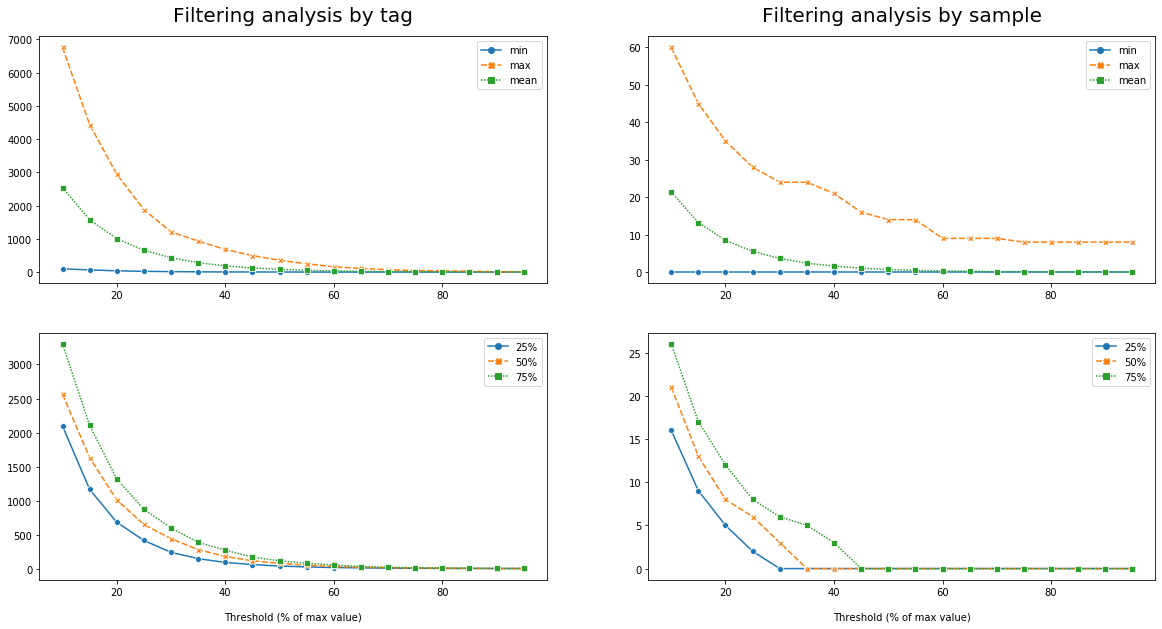

In [20]:
fig, axs = plt.subplots(2,2, figsize=(20,10))
axs = axs.ravel()
sns.lineplot(data=tags_data.loc[:,['min', 'max', 'mean']],markers=True, ax=axs[0])
axs[0].set_title('Filtering analysis by tag', pad=15, size=20)
sns.lineplot(data=samples_data.loc[:,['min', 'max', 'mean']],markers=True, ax=axs[1])
axs[1].set_title('Filtering analysis by sample', pad=15, size=20)
sns.lineplot(data=tags_data.loc[:,['25%', '50%', '75%']],markers=True, ax=axs[2])
axs[2].set_xlabel('Threshold (% of max value)', labelpad=15)
sns.lineplot(data=samples_data.loc[:,['25%', '50%', '75%']],markers=True, ax=axs[3])
axs[3].set_xlabel('Threshold (% of max value)', labelpad=15)

Les résultats ne sont pas très probants, on se retrouve selon les cas soit à n'avoir aucun tags pour plus d'un quart des tags, ou bien ensuite des questions avec un nombre de tags élevés (+ de 8 et jusqu'à plusieurs dizaines).

Exemple de résultat avec seuillage minimal à 25% de la valeur maximale pour chaque variable :

In [21]:
filtered_target_lda = final_target_lda.copy()
    
for tag in filtered_target_lda.columns:
    filtered_target_lda[tag][filtered_target_lda[tag] < filtered_target_lda[tag].max() * 0.25] = 0
    filtered_target_lda[tag][filtered_target_lda[tag] != 0 ] = 1

In [22]:
print(filtered_target_lda.iloc[2700,:][filtered_target_lda.iloc[2700,:]==1])

animation       1.0
bash            1.0
bootstrap       1.0
class           1.0
environment     1.0
import          1.0
int             1.0
menu            1.0
method          1.0
notification    1.0
pipeline        1.0
session         1.0
svg             1.0
task            1.0
testing         1.0
unit            1.0
Name: 2700, dtype: float64


In [23]:
print(questions[27000])

adal authentication prompt client parameter configure authentication prompt ad client user client credential 


In [24]:
print(data.loc[27000, 'body'])

<p>When I configure an Authentication prompt to connect to Azure AD:</p>

<pre><code>        AuthenticationContext authContext = new AuthenticationContext(authority);

        var result = authContext.AcquireTokenAsync(resource (using the clientID), 
                     clientId, 
                     redirectUri,
                     new PlatformParameters(PromptBehavior.SelectAccount))
                     .Result;
</code></pre>

<p>It fails with the error: </p>

<blockquote>
  <p>"AADSTS7000218: The request body must contain the following parameter:
  'client_assertion' or 'client_secret'"</p>
</blockquote>

<p>Should a client_secret need to be configured when we are connecting by user, not client, credentials and if so how does it need to be configured?</p>



Les résultats pour cet exemple ne sont pas très concluants, on essaiera une autre méthode avec ce même exemple pour comparer.

#### Via sélection des X tags les plus probables :

Une autre option est de retenir uniquement les 10 tags ayant une proportion plus importante :

In [20]:
top_tags_indices_lda = np.argsort(-final_target_lda.values, axis=1)[:, :10]
# print(final_target.iloc[0,top_tags_indices[0]])
for index, row in final_target_lda.iterrows(): 
     row[top_tags_indices_lda[index]]=1
# print(final_target.iloc[0,top_tags_indices[0]])
final_target_lda[final_target_lda != 1] = 0

In [21]:
tags_data = pd.Series(final_target_lda.sum()).describe()
display(tags_data)

count      371.000000
mean      1187.843666
std       1821.801788
min          0.000000
25%         94.000000
50%        341.000000
75%       1507.000000
max      11532.000000
dtype: float64

Ci dessous une représentation wordcloud des tags les plus fréquents obtenus via cette méthode :

(-0.5, 399.5, 199.5, -0.5)

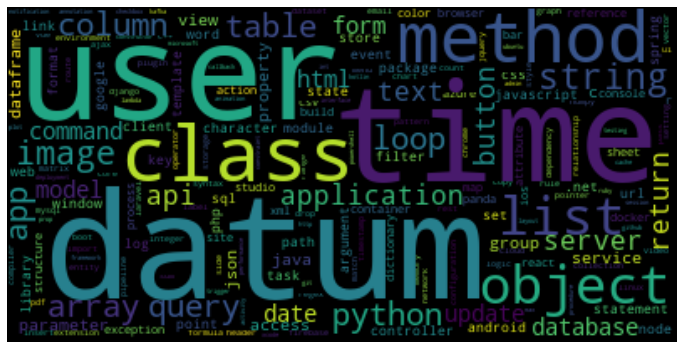

In [27]:
plt.figure(figsize=(12,8))
wordcloud = WordCloud(max_words=500)
fig = wordcloud.generate_from_frequencies(frequencies=final_target_lda.sum())
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

exmple de résultat pour une question :

In [27]:
print(data.loc[27000, 'body'])

<p>When I configure an Authentication prompt to connect to Azure AD:</p>

<pre><code>        AuthenticationContext authContext = new AuthenticationContext(authority);

        var result = authContext.AcquireTokenAsync(resource (using the clientID), 
                     clientId, 
                     redirectUri,
                     new PlatformParameters(PromptBehavior.SelectAccount))
                     .Result;
</code></pre>

<p>It fails with the error: </p>

<blockquote>
  <p>"AADSTS7000218: The request body must contain the following parameter:
  'client_assertion' or 'client_secret'"</p>
</blockquote>

<p>Should a client_secret need to be configured when we are connecting by user, not client, credentials and if so how does it need to be configured?</p>



In [29]:
print(final_target_lda.iloc[27000,top_tags_indices_lda[27000]])

application       1.0
client            1.0
command           1.0
user              1.0
permission        1.0
parameter         1.0
authentication    1.0
return            1.0
argument          1.0
map               1.0
Name: 27000, dtype: float64


Question post traitement :

In [28]:
print(questions[108])

swiperefreshlayout animation despite setrefresh -PRON- refresh activity layout view datum process java equivalent stop that refresh indicator -PRON- checke debugger operation callback ' ve site state refresh set n't mean neither time refresh indicator wo n't refresh refresh indicator pull gesture refresh indicator n't refresh indicator gesture refresh indicator n't n't thread loaddata thread thread thread callback state widget yes postdelayed ms ms swipe refresh yes refresh indicator n't refresh indicator behind .post .isrefreshing 


Tags les plus importants :

In [30]:
print(final_target_lda.iloc[108,top_tags_indices_lda[108]])

list          1.0
column        1.0
dataframe     1.0
dictionary    1.0
panda         1.0
cache         1.0
sheet         1.0
formula       1.0
matrix        1.0
excel         1.0
Name: 108, dtype: float64


Cette fois ci les résultats semblent plus cohérents, on retiendra donc cette méthode.

## Cible NMF :

On effectue le même travail que précédement pour la représentation de la cible issue de la NMF.

In [28]:
features_nmf, target_nmf, vocab_nmf, tags_nmf = functions.load_unsupervivised_model('nmf_model')

### Conversion de la cible en matrice samples / tags :

In [29]:
new_target_nmf = pd.DataFrame()
for topic in tags_nmf.keys():
    for key_word, coeff in tags_nmf[topic].items():
        new_col_values = target_nmf[:,int(topic)] * coeff
        new_target_nmf.insert(loc=0, column=key_word ,value=new_col_values, allow_duplicates=True)
display(new_target_nmf.shape)
final_target_nmf = new_target_nmf.groupby(new_target_nmf.columns, axis=1).mean()  
display(final_target_nmf.shape)
display(final_target_nmf)

(44069, 1118)

(44069, 409)

,.net,access,action,activity,admin,aggregation,ajax,algorithm,amazon,android,...,word,wordpress,worker,wpf,xamarin,xcode,xml,xpath,xslt,zip
0,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.001354,0.000034,0.012405,3.487460e-05,0.009085,0.000136,0.000000,0.000000,0.288272,...,0.005671,0.000167,0.000000,0.000040,0.005331,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.005025,0.000010,0.000472,3.440810e-05,0.000000,0.000003,0.000125,0.000322,0.009935,...,0.000239,0.000000,0.000147,0.000043,0.000184,0.000000,0.007643,0.000126,0.000408,0.000154
3,0.142070,0.000000,0.000000,0.000000,1.062421e-05,0.000000,0.000233,0.000000,0.000015,0.000000,...,0.000000,0.000000,0.000062,0.002341,0.000000,0.067417,0.000000,0.000000,0.000000,0.000009
4,0.000532,0.000000,0.000006,0.000015,2.314693e-05,0.000000,0.000002,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000328,0.000490,0.000000,0.000000,0.002004,0.000028,0.000101,0.000117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44064,0.004061,0.000156,0.000350,0.000051,8.684010e-04,0.000341,0.000098,0.000124,0.000315,0.000639,...,0.000098,0.000015,0.000147,0.000021,0.000037,0.000220,0.002489,0.000060,0.000148,0.000121
44065,0.000000,0.000000,0.000704,0.001067,0.000000e+00,0.000000,0.003226,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.002103,0.000000,0.186330,0.002452,0.009426,0.000033
44066,0.000000,0.000000,0.000000,0.000000,4.090210e-08,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.242673,0.000000,0.000000,0.000043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
44067,0.000000,0.005051,0.000020,0.000000,1.436099e-04,0.000000,0.000000,0.002013,0.000000,0.000000,...,0.000000,0.000000,0.000037,0.000062,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Conservation des tags les plus importants par échantillon :

On utilisera la méthode de sélection des 10 tags les plus importants étant donné les résultats obtenus dans la partie 'Cible lda'.

In [30]:
top_tags_indices_nmf = np.argsort(-final_target_nmf.values, axis=1)[:, :10]
# print(final_target.iloc[0,top_tags_indices[0]])
for index, row in final_target_nmf.iterrows(): 
     row[top_tags_indices_nmf[index]]=1
# print(final_target.iloc[0,top_tags_indices[0]])
final_target_nmf[final_target_nmf != 1] = 0

(-0.5, 399.5, 199.5, -0.5)

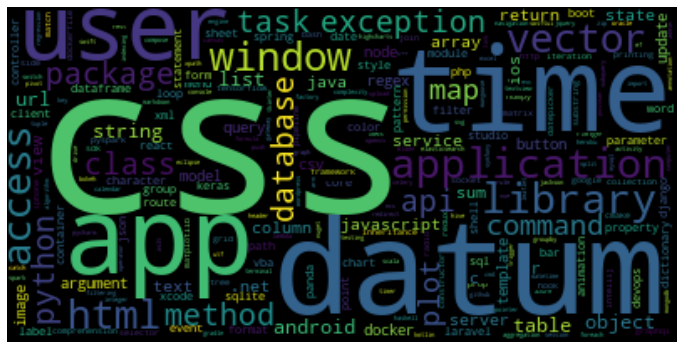

In [32]:
plt.figure(figsize=(12,8))
wordcloud = WordCloud(max_words=500)
fig = wordcloud.generate_from_frequencies(frequencies=final_target_nmf.sum())
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [31]:
print(final_target_nmf.iloc[27000,top_tags_indices_nmf[27000]])

parameter      1.0
user           1.0
server         1.0
api            1.0
access         1.0
library        1.0
command        1.0
client         1.0
service        1.0
application    1.0
Name: 27000, dtype: float64


In [35]:
print(questions[108])

dictionary panda dataframe list dictionary list row dataframe country dataframe game dict length dict dataframe row ' m thinking dict keys column excel sheet 


In [36]:
print(final_target_nmf.iloc[108,top_tags_indices_nmf[108]])

dataframe     1.0
dictionary    1.0
list          1.0
column        1.0
panda         1.0
pyspark       1.0
key           1.0
vba           1.0
spark         1.0
character     1.0
Name: 108, dtype: float64


In [37]:
print(data.loc[108, 'tags'])

['python-3.x', 'pandas', 'list', 'dataframe']


# Création d'un modèle supervisé à partir des nouvelles cibles :

## Définition des éléments de modélisation :

On test les mêmes modèles que ceux essayés pour l'apprentissage purement supervisé. En ce qui concerne la représentation des données, on utilisera pour celles utilisées pour la construction de chaque cible ( Tf-Idf pour NMF et TF pour LDA).

In [38]:
nmf_vectorizer = TfidfVectorizer(max_df=0.15 ,min_df=20, token_pattern='\S+')
lda_vectorizer = CountVectorizer(max_df=0.15, min_df=20, token_pattern='\S+')

In [39]:
Ridge = OneVsRestClassifier(RidgeClassifier(solver='sag'))
Logistic = OneVsRestClassifier(LogisticRegression(solver='sag'))
SGDC = OneVsRestClassifier(SGDClassifier())
MultiNB = OneVsRestClassifier(MultinomialNB())

In [40]:
param_grid_Ridge = {'Ridge__estimator__alpha': (0.1, 1, 10)}
param_grid_Logistic = {'Logistic__estimator__C': (0.1, 0.5, 1)}
param_grid_SGDC = {'SGDC__estimator__loss': ('modified_huber', 'hinge')}
param_grid_MultiNB = {'MultiNB__estimator__alpha': (0.1, 0.4, 0.6,0.8,1)}

### NMF :

In [41]:
Ridge_pipe_nmf = Pipeline([('vectorizer', nmf_vectorizer), ('Ridge', Ridge)])
Logistic_pipe_nmf = Pipeline([('vectorizer', nmf_vectorizer), ('Logistic', Logistic)])
SGDC_pipe_nmf = Pipeline([('vectorizer', nmf_vectorizer), ('SGDC', SGDC)])
MultiNB_pipe_nmf = Pipeline([('vectorizer', nmf_vectorizer), ('MultiNB', MultiNB)])

In [42]:
Ridge_CV_nmf = GridSearchCV(Ridge_pipe_nmf, param_grid_Ridge, cv=4, return_train_score=True, scoring='f1_macro', n_jobs=-1)
Logistic_CV_nmf = GridSearchCV(Logistic_pipe_nmf, param_grid_Logistic, cv=4, return_train_score=True, scoring='f1_macro', n_jobs=-1)
SGDC_CV_nmf = GridSearchCV(SGDC_pipe_nmf, param_grid_SGDC, cv=4, return_train_score=True, scoring='f1_macro', n_jobs=-1)
MultiNB_CV_nmf = GridSearchCV(MultiNB_pipe_nmf, param_grid_MultiNB, cv=4, return_train_score=True, scoring='f1_macro', n_jobs=-1)

### LDA :

In [43]:
Ridge_pipe_lda = Pipeline([('vectorizer', lda_vectorizer), ('Ridge', Ridge)])
Logistic_pipe_lda = Pipeline([('vectorizer', lda_vectorizer), ('Logistic', Logistic)])
SGDC_pipe_lda = Pipeline([('vectorizer', lda_vectorizer), ('SGDC', SGDC)])
MultiNB_pipe_lda = Pipeline([('vectorizer', lda_vectorizer), ('MultiNB', MultiNB)])

In [44]:
Ridge_CV_lda = GridSearchCV(Ridge_pipe_lda, param_grid_Ridge, cv=4, return_train_score=True, scoring='f1_macro', n_jobs=-1)
Logistic_CV_lda = GridSearchCV(Logistic_pipe_lda, param_grid_Logistic, cv=4, return_train_score=True, scoring='f1_macro', n_jobs=-1)
SGDC_CV_lda = GridSearchCV(SGDC_pipe_lda, param_grid_SGDC, cv=4, return_train_score=True, scoring='f1_macro', n_jobs=-1)
MultiNB_CV_lda = GridSearchCV(MultiNB_pipe_lda, param_grid_MultiNB, cv=4, return_train_score=True, scoring='f1_macro', n_jobs=-1)

## Modélisation à partir de la cible NMF :

### Réduction du nombre de tags à prédire :

In [176]:
top_100_tags_filter = final_target_nmf.sum().sort_values(ascending=False)[:100].index
tags_vocab = pd.read_csv('models_tags_vocabulary.csv', header=0)
tags_vocab['NMF'] = top_100_tags_filter
tags_vocab.to_csv('models_tags_vocabulary.csv', index=False)

In [46]:
target_nmf_filtered = final_target_nmf.loc[:,top_100_tags_filter]
print(target_nmf_filtered.shape)
target_nmf_filtered[target_nmf_filtered.any(axis=1)]
print(target_nmf_filtered.shape)
target_nmf_filtered = csr_matrix(target_nmf_filtered.values)

(44069, 100)
(44069, 100)


### Séparation en jeu de test et jeu d'entrainement :

In [86]:
X_train, X_test, y_train, y_test = train_test_split(questions, target_nmf_filtered, test_size=0.2, random_state=42)

In [48]:
print('X_train shape : ' + str(X_train.shape))
print('X_test shape : ' + str(X_test.shape))

print('y_train shape : ' + str(y_train.shape))
print('y_test shape : ' + str(y_test.shape))

X_train shape : (35255,)
X_test shape : (8814,)
y_train shape : (35255, 100)
y_test shape : (8814, 100)


### Entrainement du modèle :

#### Classifieur Ridge

In [49]:
Ridge_cv_model_nmf = Ridge_CV_nmf.fit(X_train, y_train)

In [50]:
Ridge_cv_results_nmf = pd.DataFrame(Ridge_cv_model_nmf.cv_results_)
display(Ridge_cv_results_nmf)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Ridge__estimator__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,31.776464,0.048107,0.230417,0.011301,0.1,{'Ridge__estimator__alpha': 0.1},0.699714,0.696870,0.695579,0.696669,0.697208,0.001528,1,0.745246,0.746937,0.746178,0.747013,0.746344,0.000713
1,20.693163,0.049082,0.188037,0.004182,1,{'Ridge__estimator__alpha': 1},0.691475,0.688952,0.687187,0.688394,0.689002,0.001564,2,0.729481,0.731633,0.730614,0.730641,0.730593,0.000762
2,12.393552,0.079048,0.188312,0.008380,10,{'Ridge__estimator__alpha': 10},0.614301,0.611548,0.608536,0.612066,0.611613,0.002056,3,0.630217,0.631276,0.631485,0.630149,0.630781,0.000604


Text(0.5, 1.0, 'mean_train_score')

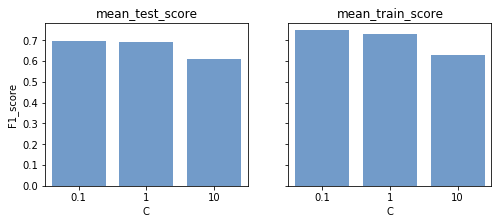

In [77]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3), sharey=True)
sns.barplot(x='param_Ridge__estimator__alpha', y='mean_test_score', data=Ridge_cv_results_nmf, ax=ax1, color='#639ad8')
ax1.set_xlabel('C')
ax1.set_ylabel('F1_score')
ax1.set_title('mean_test_score')
sns.barplot(x='param_Ridge__estimator__alpha', y='mean_train_score', data=Ridge_cv_results_nmf, ax=ax2, color='#639ad8')
ax2.set_xlabel('C')
ax2.set_ylabel('')
ax2.set_title('mean_train_score')

#### Régression logistique

In [51]:
Logistic_cv_model_nmf = Logistic_CV_nmf.fit(X_train, y_train)

In [52]:
Logistic_cv_results_nmf = pd.DataFrame(Logistic_cv_model_nmf.cv_results_)
display(Logistic_cv_results_nmf)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Logistic__estimator__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,13.031990,0.030387,0.180399,0.003338,0.1,{'Logistic__estimator__C': 0.1},0.364924,0.364882,0.363695,0.360465,0.363492,0.001816,3,0.368847,0.368765,0.370230,0.370079,0.369480,0.000677
1,15.089828,0.153855,0.194238,0.005789,0.5,{'Logistic__estimator__C': 0.5},0.666261,0.662341,0.661582,0.661933,0.663029,0.001885,2,0.684480,0.685548,0.685697,0.685259,0.685246,0.000469
2,16.876866,0.137403,0.197730,0.004957,1,{'Logistic__estimator__C': 1},0.741287,0.737706,0.738775,0.738056,0.738956,0.001400,1,0.770787,0.771523,0.771064,0.771950,0.771331,0.000444


Text(0.5, 1.0, 'mean_train_score')

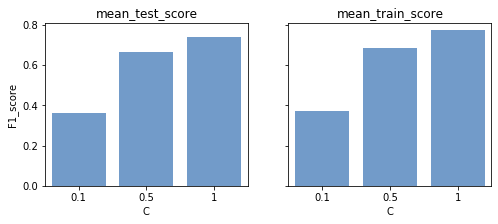

In [78]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3), sharey=True)
sns.barplot(x='param_Logistic__estimator__C', y='mean_test_score', data=Logistic_cv_results_nmf, ax=ax1, color='#639ad8')
ax1.set_xlabel('C')
ax1.set_ylabel('F1_score')
ax1.set_title('mean_test_score')
sns.barplot(x='param_Logistic__estimator__C', y='mean_train_score', data=Logistic_cv_results_nmf, ax=ax2, color='#639ad8')
ax2.set_xlabel('C')
ax2.set_ylabel('')
ax2.set_title('mean_train_score')

#### Modèles linéaires avec SGDC

In [53]:
SGDC_cv_model_nmf = SGDC_CV_nmf.fit(X_train, y_train)

In [54]:
SGDC_cv_results_nmf = pd.DataFrame(SGDC_cv_model_nmf.cv_results_)
display(SGDC_cv_results_nmf)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_SGDC__estimator__loss,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,4.500284,0.018772,0.192374,0.003646,modified_huber,{'SGDC__estimator__loss': 'modified_huber'},0.840735,0.839920,0.839104,0.835760,0.838880,0.001891,1,0.899746,0.901760,0.899947,0.901688,0.900785,0.000942
1,4.078459,0.024691,0.195418,0.006358,hinge,{'SGDC__estimator__loss': 'hinge'},0.794295,0.790102,0.789147,0.789043,0.790647,0.002146,2,0.821435,0.822728,0.821654,0.823202,0.822255,0.000734


Text(0.5, 1.0, 'mean_train_score')

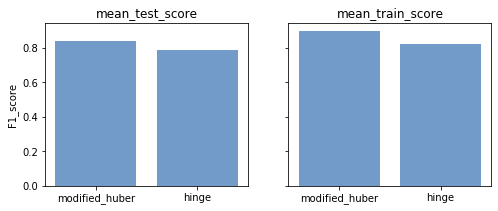

In [79]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3), sharey=True)
sns.barplot(x='param_SGDC__estimator__loss', y='mean_test_score', data=SGDC_cv_results_nmf, ax=ax1, color='#639ad8')
ax1.set_xlabel('')
ax1.set_ylabel('F1_score')
ax1.set_title('mean_test_score')
sns.barplot(x='param_SGDC__estimator__loss', y='mean_train_score', data=SGDC_cv_results_nmf, ax=ax2, color='#639ad8')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('mean_train_score')

#### Modèle bayésien naif

In [55]:
MultiNB_cv_model_nmf = MultiNB_CV_nmf.fit(X_train, y_train)

In [56]:
MultiNB_cv_results_nmf = pd.DataFrame(MultiNB_cv_model_nmf.cv_results_)
display(MultiNB_cv_results_nmf)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_MultiNB__estimator__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,1.049487,0.012914,0.282382,0.003239,0.1,{'MultiNB__estimator__alpha': 0.1},0.518943,0.518136,0.511163,0.513891,0.515533,0.003170,1,0.569356,0.573502,0.572469,0.572646,0.571993,0.001572
1,1.051853,0.010603,0.285126,0.002071,0.4,{'MultiNB__estimator__alpha': 0.4},0.495473,0.493503,0.490217,0.490568,0.492440,0.002166,2,0.535919,0.539163,0.539397,0.539390,0.538467,0.001474
2,1.050486,0.015197,0.279890,0.002674,0.6,{'MultiNB__estimator__alpha': 0.6},0.480010,0.477130,0.473922,0.474022,0.476271,0.002515,3,0.515897,0.519660,0.520152,0.519724,0.518858,0.001720
3,1.050982,0.011207,0.282007,0.004208,0.8,{'MultiNB__estimator__alpha': 0.8},0.463427,0.460726,0.457829,0.458109,0.460023,0.002267,4,0.497144,0.500504,0.501702,0.499705,0.499764,0.001671
4,1.064323,0.018074,0.280137,0.001914,1,{'MultiNB__estimator__alpha': 1},0.447861,0.445560,0.442443,0.443462,0.444831,0.002079,5,0.479545,0.481792,0.483353,0.481935,0.481656,0.001363


Text(0.5, 1.0, 'mean_train_score')

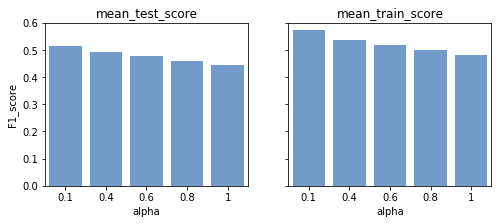

In [80]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3), sharey=True)
sns.barplot(x='param_MultiNB__estimator__alpha', y='mean_test_score', data=MultiNB_cv_results_nmf, ax=ax1, color='#639ad8')
ax1.set_xlabel('alpha')
ax1.set_ylabel('F1_score')
ax1.set_title('mean_test_score')
sns.barplot(x='param_MultiNB__estimator__alpha', y='mean_train_score', data=MultiNB_cv_results_nmf, ax=ax2, color='#639ad8')
ax2.set_xlabel('alpha')
ax2.set_ylabel('')
ax2.set_title('mean_train_score')

### Comparatif des résultats :

In [81]:
results_nmf = pd.DataFrame()
results_nmf = results_nmf.append(Ridge_cv_results_nmf.loc[Ridge_cv_model_nmf.best_index_,['mean_test_score','mean_train_score']])
results_nmf = results_nmf.append(Logistic_cv_results_nmf.loc[Logistic_cv_model_nmf.best_index_,['mean_test_score','mean_train_score']])
results_nmf = results_nmf.append(SGDC_cv_results_nmf.loc[SGDC_cv_model_nmf.best_index_,['mean_test_score','mean_train_score']])
results_nmf = results_nmf.append(MultiNB_cv_results_nmf.loc[MultiNB_cv_model_nmf.best_index_,['mean_test_score','mean_train_score']])
results_nmf['model'] = ['Ridge', 'Logistic', 'SGDC', 'MultiNB']

Text(0.5, 1.0, 'mean_train_score')

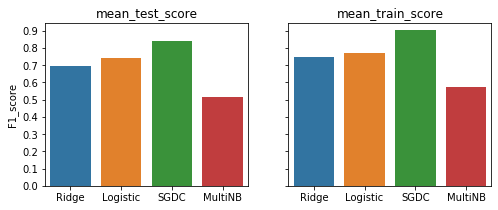

In [82]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3), sharey=True)
sns.barplot(x='model', y='mean_test_score', data=results_nmf, ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('F1_score')
ax1.set_title('mean_test_score')
ax1.yaxis.set_major_locator(mplb.ticker.MultipleLocator(base=0.1))
sns.barplot(x='model', y='mean_train_score', data=results_nmf, ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('mean_train_score')

Comme pour l'étude avec apprentissage purement supervisé le classifier linéaire avec SGDC donne les meilleurs performances. Les valeurs de F1 score sont plus élevées dans ce cas, mais cela ne veut pas dire grand chose puisque la cible est totalement différente et les mots clés même prédits correctement peuvent ne pas avoir de sens puisque issus de l'approche non supervisée.

### Sauvegarde du modèle :

In [84]:
#dump(SGDC_cv_model_nmf.best_estimator_, 'SGDC_NMF_Model.joblib')

['SGDC_NMF_Model.joblib']

### Performances sur le set de test :

In [117]:
SGDC_NMF_Model = load('SGDC_NMF_Model.joblib')

In [87]:
print('SGDC NMF F1 score :')
f1_score(SGDC_NMF_Model.predict(X_test), y_test, average='macro')

SGDC NMF F1 score :


0.8408501854080587

On retrouve sur le test set des performances similaires à celle obtenues lors du GridSearch.

## Modélisation à partir de la cible LDA :

### Réduction du nombre de tags à prédire :

In [177]:
top_100_tags_filter = final_target_lda.sum().sort_values(ascending=False)[:100].index
tags_vocab = pd.read_csv('models_tags_vocabulary.csv', header=0)
tags_vocab['LDA'] = top_100_tags_filter
tags_vocab.to_csv('models_tags_vocabulary.csv', index=False)

In [58]:
target_lda_filtered = final_target_lda.loc[:,top_100_tags_filter]
print(target_lda_filtered.shape)
target_lda_filtered[target_lda_filtered.any(axis=1)]
print(target_lda_filtered.shape)
target_lda_filtered = csr_matrix(target_lda_filtered.values)

(44069, 100)
(44069, 100)


### Séparation en jeu de test et jeu d'entrainement :

In [90]:
X_train, X_test, y_train, y_test = train_test_split(questions, target_lda_filtered, test_size=0.2, random_state=42)

In [60]:
print('X_train shape : ' + str(X_train.shape))
print('X_test shape : ' + str(X_test.shape))

print('y_train shape : ' + str(y_train.shape))
print('y_test shape : ' + str(y_test.shape))

X_train shape : (35255,)
X_test shape : (8814,)
y_train shape : (35255, 100)
y_test shape : (8814, 100)


### Entrainement du modèle :

####  classifieur ridge

In [61]:
Ridge_cv_model_lda = Ridge_CV_lda.fit(X_train, y_train)

In [62]:
Ridge_cv_results_lda = pd.DataFrame(Ridge_cv_model_lda.cv_results_)
display(Ridge_cv_results_lda)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Ridge__estimator__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,337.241985,41.123345,0.201762,0.002285,0.1,{'Ridge__estimator__alpha': 0.1},0.594805,0.605933,0.625855,0.597932,0.606131,0.012089,1,0.638552,0.639091,0.674436,0.636844,0.647231,0.015729
1,335.813626,43.477431,0.201002,0.002553,1,{'Ridge__estimator__alpha': 1},0.594291,0.605282,0.624953,0.597177,0.605426,0.011973,2,0.637886,0.638446,0.673174,0.636180,0.646421,0.015468
2,291.526820,50.408348,0.189767,0.014190,10,{'Ridge__estimator__alpha': 10},0.588199,0.599282,0.617661,0.591815,0.599239,0.011362,3,0.631037,0.631145,0.662246,0.629391,0.638455,0.013754


Text(0.5, 1.0, 'mean_train_score')

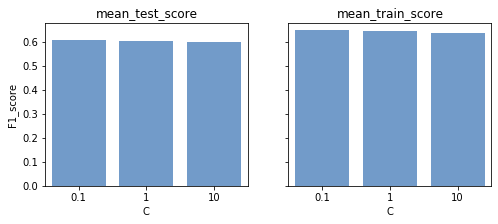

In [72]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3), sharey=True)
sns.barplot(x='param_Ridge__estimator__alpha', y='mean_test_score', data=Ridge_cv_results_lda, ax=ax1, color='#639ad8')
ax1.set_xlabel('C')
ax1.set_ylabel('F1_score')
ax1.set_title('mean_test_score')
sns.barplot(x='param_Ridge__estimator__alpha', y='mean_train_score', data=Ridge_cv_results_lda, ax=ax2, color='#639ad8')
ax2.set_xlabel('C')
ax2.set_ylabel('')
ax2.set_title('mean_train_score')

#### Régression logistique

In [63]:
Logistic_cv_model_lda = Logistic_CV_lda.fit(X_train, y_train)

E:\Antoine\Logiciels\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [64]:
Logistic_cv_results_lda = pd.DataFrame(Logistic_cv_model_lda.cv_results_)
display(Logistic_cv_results_lda)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Logistic__estimator__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,99.151157,0.262802,0.200210,0.006626,0.1,{'Logistic__estimator__C': 0.1},0.693849,0.692645,0.806542,0.696445,0.722371,0.048616,3,0.713140,0.711878,0.849406,0.711940,0.746591,0.059362
1,99.252268,0.396520,0.198822,0.009430,0.5,{'Logistic__estimator__C': 0.5},0.697852,0.696417,0.825223,0.700509,0.730001,0.054997,2,0.717340,0.716050,0.873532,0.716222,0.755786,0.067983
2,98.593971,0.293471,0.201730,0.000834,1,{'Logistic__estimator__C': 1},0.698667,0.696826,0.826997,0.700971,0.730866,0.055522,1,0.717916,0.716591,0.876277,0.716717,0.756876,0.068939


Text(0.5, 1.0, 'mean_train_score')

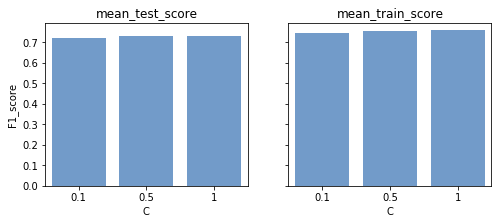

In [71]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3), sharey=True)
sns.barplot(x='param_Logistic__estimator__C', y='mean_test_score', data=Logistic_cv_results_lda, ax=ax1, color='#639ad8')
ax1.set_xlabel('C')
ax1.set_ylabel('F1_score')
ax1.set_title('mean_test_score')
sns.barplot(x='param_Logistic__estimator__C', y='mean_train_score', data=Logistic_cv_results_lda, ax=ax2, color='#639ad8')
ax2.set_xlabel('C')
ax2.set_ylabel('')
ax2.set_title('mean_train_score')

#### Modèles linéaires avec SGDC

In [65]:
SGDC_cv_model_lda = SGDC_CV_lda.fit(X_train, y_train)

In [66]:
SGDC_cv_results_lda = pd.DataFrame(SGDC_cv_model_lda.cv_results_)
display(SGDC_cv_results_lda)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_SGDC__estimator__loss,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,24.474520,0.222523,0.210496,0.019711,modified_huber,{'SGDC__estimator__loss': 'modified_huber'},0.763016,0.761749,0.766487,0.765372,0.764156,0.001871,2,0.929676,0.929926,0.931696,0.930313,0.930403,0.000781
1,9.483993,0.143011,0.210497,0.013589,hinge,{'SGDC__estimator__loss': 'hinge'},0.814813,0.813378,0.814934,0.813115,0.814060,0.000820,1,0.939206,0.941388,0.940214,0.940038,0.940212,0.000779


Text(0.5, 1.0, 'mean_train_score')

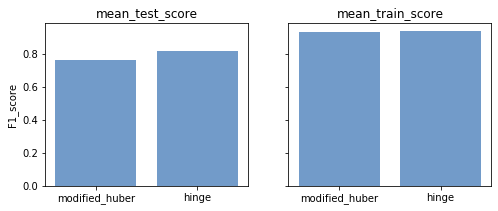

In [70]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3), sharey=True)
sns.barplot(x='param_SGDC__estimator__loss', y='mean_test_score', data=SGDC_cv_results_lda, ax=ax1, color='#639ad8')
ax1.set_xlabel('')
ax1.set_ylabel('F1_score')
ax1.set_title('mean_test_score')
sns.barplot(x='param_SGDC__estimator__loss', y='mean_train_score', data=SGDC_cv_results_lda, ax=ax2, color='#639ad8')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('mean_train_score')

#### Modèle bayésien naif

In [67]:
MultiNB_cv_model_lda = MultiNB_CV_lda.fit(X_train, y_train)

In [68]:
MultiNB_cv_results_lda = pd.DataFrame(MultiNB_cv_model_lda.cv_results_)
display(MultiNB_cv_results_lda)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_MultiNB__estimator__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,1.158899,0.009948,0.305434,0.004311,0.1,{'MultiNB__estimator__alpha': 0.1},0.566666,0.574181,0.568906,0.570691,0.570111,0.002749,5,0.637769,0.638267,0.635755,0.636312,0.637026,0.001027
1,1.164156,0.003946,0.303127,0.002067,0.4,{'MultiNB__estimator__alpha': 0.4},0.568759,0.577274,0.572242,0.573568,0.572961,0.003047,4,0.631886,0.632207,0.629818,0.630422,0.631083,0.000993
2,1.192153,0.008443,0.306550,0.001728,0.6,{'MultiNB__estimator__alpha': 0.6},0.569253,0.578181,0.572966,0.574297,0.573674,0.003192,3,0.629916,0.630250,0.628008,0.628670,0.629211,0.000911
3,1.178765,0.017986,0.306058,0.003499,0.8,{'MultiNB__estimator__alpha': 0.8},0.570102,0.579265,0.574086,0.575063,0.574629,0.003259,2,0.628690,0.628917,0.626546,0.627308,0.627865,0.000979
4,1.161047,0.008191,0.304937,0.002008,1,{'MultiNB__estimator__alpha': 1},0.571392,0.580043,0.574492,0.575679,0.575402,0.003104,1,0.627766,0.627866,0.625465,0.626136,0.626808,0.001036


Text(0.5, 1.0, 'mean_train_score')

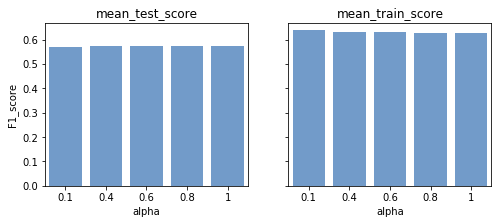

In [69]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3), sharey=True)
sns.barplot(x='param_MultiNB__estimator__alpha', y='mean_test_score', data=MultiNB_cv_results_lda, ax=ax1, color='#639ad8')
ax1.set_xlabel('alpha')
ax1.set_ylabel('F1_score')
ax1.set_title('mean_test_score')
sns.barplot(x='param_MultiNB__estimator__alpha', y='mean_train_score', data=MultiNB_cv_results_lda, ax=ax2, color='#639ad8')
ax2.set_xlabel('alpha')
ax2.set_ylabel('')
ax2.set_title('mean_train_score')

### Comparatif des résultats :

In [75]:
results_lda = pd.DataFrame()
results_lda = results_lda.append(Ridge_cv_results_lda.loc[Ridge_cv_model_lda.best_index_,['mean_test_score','mean_train_score']])
results_lda = results_lda.append(Logistic_cv_results_lda.loc[Logistic_cv_model_lda.best_index_,['mean_test_score','mean_train_score']])
results_lda = results_lda.append(SGDC_cv_results_lda.loc[SGDC_cv_model_lda.best_index_,['mean_test_score','mean_train_score']])
results_lda = results_lda.append(MultiNB_cv_results_lda.loc[MultiNB_cv_model_lda.best_index_,['mean_test_score','mean_train_score']])
results_lda['model'] = ['Ridge', 'Logistic', 'SGDC', 'MultiNB']

Text(0.5, 1.0, 'mean_train_score')

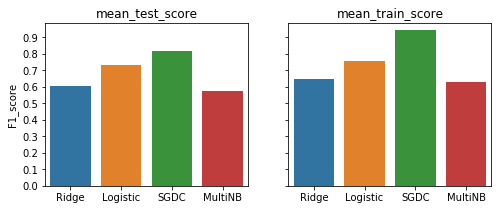

In [76]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3), sharey=True)
sns.barplot(x='model', y='mean_test_score', data=results_lda, ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('F1_score')
ax1.set_title('mean_test_score')
ax1.yaxis.set_major_locator(mplb.ticker.MultipleLocator(base=0.1))
sns.barplot(x='model', y='mean_train_score', data=results_lda, ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('mean_train_score')

Comme pour l'étude avec apprentissage purement supervisé le classifier linéaire avec SGDC donne les meilleurs performances. Le F1 score est plus élevé que pour l'approche supervisée et un peu plus faible sur certains modèles qu'avec l'approche non supervisée NMF. Comme expliqué précédemment cependant cela ne peut constituer un critère de sélection.

### Sauvegarde du modèle :

In [88]:
#dump(SGDC_cv_model_lda.best_estimator_, 'SGDC_LDA_Model.joblib')

['SGDC_LDA_Model.joblib']

### Performances sur le set de test :

In [89]:
SGDC_LDA_Model = load('SGDC_LDA_Model.joblib')

In [91]:
print('SGDC LDA F1 score :')
f1_score(SGDC_LDA_Model.predict(X_test), y_test, average='macro')

SGDC LDA F1 score :


0.8279069990102091

On retrouve sur le test set des performances similaires à celle obtenues lors du GridSearch.

# Exemple d'application des deux modèles :

Pour l'exemple d'utilisation on utilisera une partie du reste des questions qui n'ont pas été utilisées pour la modélisation :

In [92]:
data_exemple = original_data.loc[-round(len(original_data)/4):,:]

In [93]:
questions_exemple = data_exemple['cleaned_questions'] + ' ' + data_exemple['files_extensions'] + ' ' + data_exemple['C++'] + ' ' + data_exemple['C#']

In [94]:
questions_exemple = questions_exemple.apply(lambda x: re.sub("\s+", ' ', x))

In [114]:
def tags_suggestion(model, vocabulary, question):
    model_tags = model.predict(question)
    print(vocabulary[model_tags.nonzero()[1]])

## Exemple 1 :

In [158]:
print('Titre de la question :')
print(data_exemple.loc[8, 'title'])
print('\n Tags utilisés :')
print(data_exemple.loc[8, 'tags'])
print('\n Corps de la question :')
print(data_exemple.loc[8, 'body'])

Titre de la question :
Stop SwipeRefreshLayout refresh animation, despite setRefresh(false)/isRefreshing=false

 Tags utilisés :
['java', 'android', 'android-layout', 'kotlin', 'swiperefreshlayout']

 Corps de la question :
<p>Im using <code>SwipeRefreshLayout</code> to refresh my activity. Layout looks like this, very simple:</p>

<pre><code>&lt;androidx.swiperefreshlayout.widget.SwipeRefreshLayout
        xmlns:android="http://schemas.android.com/apk/res/android"
        xmlns:tools="http://schemas.android.com/tools"
        android:id="@+id/swipeRefreshLayout"
        android:layout_width="match_parent"
        android:layout_height="match_parent"&gt;
    &lt;androidx.core.widget.NestedScrollView
            android:id="@+id/feedBase"
            android:layout_width="match_parent"
            android:layout_height="match_parent"&gt;
        &lt;LinearLayout
                android:id="@+id/linearLayoutFeed"
                android:layout_width="match_parent"
                android

In [115]:
tags_suggestion(SGDC_LDA_Model, tags_vocab['LDA'], questions_exemple[[8]])

0         datum
2          time
8         image
9        python
21       button
33         view
42    statement
46      library
50      android
54        state
Name: LDA, dtype: object


In [118]:
tags_suggestion(SGDC_NMF_Model, tags_vocab['NMF'], questions_exemple[[8]])

0        css
2       time
31      view
32     state
52    update
Name: NMF, dtype: object


## Exemple 2 :

In [159]:
print('Titre de la question :')
print(data_exemple.loc[90, 'title'])
print('\n Tags utilisés :')
print(data_exemple.loc[90, 'tags'])
print('\n Corps de la question :')
print(data_exemple.loc[90, 'body'])

Titre de la question :
How to create the sequence and apply two tables in SQL Server using Entity framework 6 code first approach?

 Tags utilisés :
['c#', 'sql-server', 'entity-framework', 'entity-framework-6']

 Corps de la question :
<p>I have two table A and B</p>

<p><strong>Table A</strong> - Id Primary key not identity </p>

<p><strong>Table B</strong> - Id Primary key not identity  - Id Primary key not identity </p>

<p>How to create A and B Table primary key columns without identity(1,1) in entity framework 6 and apply sequence for these two table.</p>

<p>and this two tables need to implement sequence in SQL</p>

<p>if example Table A insert one record id is 1. and i will insert the Table B id is 2 like this </p>

<p>I was checked Identity off not working in script and Entity framework 6 
and also not able to create sequence In entity framework 6</p>

<p>But EFCore has sequencial feature</p>

<pre><code> modelBuilder.HasSequence&lt;int&gt;("OrderNumbers", schema: "shared")
  

In [161]:
tags_suggestion(SGDC_NMF_Model, tags_vocab['NMF'], questions_exemple[[90]])

11    exception
26        table
29       column
34            c
35         .net
56          sql
58         core
Name: NMF, dtype: object


In [160]:
tags_suggestion(SGDC_LDA_Model, tags_vocab['LDA'], questions_exemple[[90]])

10      column
12       query
14       table
19      server
22    database
Name: LDA, dtype: object


## Exemple 3 :

In [162]:
print('Titre de la question :')
print(data_exemple.loc[103, 'title'])
print('\n Tags utilisés :')
print(data_exemple.loc[103, 'tags'])
print('\n Corps de la question :')
print(data_exemple.loc[103, 'body'])

Titre de la question :
Server Discovery And Monitoring engine is deprecated

 Tags utilisés :
['node.js', 'mongodb', 'mongoose']

 Corps de la question :
<p>i am using mongoose with my node.js app and this is my configuration </p>

<pre><code>mongoose.connect(process.env.MONGO_URI, {
   useNewUrlParser: true,
   useUnifiedTopology: true,
   useCreateIndex: true,
   useFindAndModify: false
}).then(()=&gt;{
    console.log(`connection to database established`)
}).catch(err=&gt;{
    console.log(`db error ${err.message}`);
    process.exit(-1)
})
</code></pre>

<p>but in console it still gives me warning </p>

<blockquote>
  <p>DeprecationWarning: current Server Discovery and Monitoring engine is deprecated, and will be removed in a future version. To use the new Server Discover and Monitoring engine, pass option { useUnifiedTopology: true } to the MongoClient constructor.</p>
</blockquote>

<p>what is problem? i was not using useUnifiedTopology before but now it showed up in console and 

In [163]:
tags_suggestion(SGDC_LDA_Model, tags_vocab['LDA'], questions_exemple[[143]])

7        string
17          api
18         text
45         node
48    character
61         path
78    attribute
Name: LDA, dtype: object


In [164]:
tags_suggestion(SGDC_NMF_Model, tags_vocab['NMF'], questions_exemple[[143]])

0           css
8          html
16          api
41         text
64    character
65          xml
Name: NMF, dtype: object


## Exemple 4 :

In [165]:
print('Titre de la question :')
print(data_exemple.loc[94, 'title'])
print('\n Tags utilisés :')
print(data_exemple.loc[94, 'tags'])
print('\n Corps de la question :')
print(data_exemple.loc[94, 'body'])

Titre de la question :
Unable to allocate array with shape and data type

 Tags utilisés :
['python', 'numpy', 'data-science']

 Corps de la question :
<p>I'm facing an issue with allocating huge arrays in numpy on Ubuntu 18 while not facing the same issue on MacOS.</p>

<p>I am trying to allocate memory for a numpy array with shape <code>(156816, 36, 53806)</code>
with </p>

<pre><code>np.zeros((156816, 36, 53806), dtype='uint8')
</code></pre>

<p>and while I'm getting an error on Ubuntu OS</p>

<pre><code>&gt;&gt;&gt; import numpy as np
&gt;&gt;&gt; np.zeros((156816, 36, 53806), dtype='uint8')
Traceback (most recent call last):
  File "&lt;stdin&gt;", line 1, in &lt;module&gt;
numpy.core._exceptions.MemoryError: Unable to allocate array with shape (156816, 36, 53806) and data type uint8
</code></pre>

<p>I'm not getting it on MacOS:</p>

<pre><code>&gt;&gt;&gt; import numpy as np 
&gt;&gt;&gt; np.zeros((156816, 36, 53806), dtype='uint8')
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0

In [167]:
tags_suggestion(SGDC_LDA_Model, tags_vocab['LDA'], questions_exemple[[94]])

0          datum
2           time
11         array
59    controller
68           log
Name: LDA, dtype: object


In [166]:
tags_suggestion(SGDC_NMF_Model, tags_vocab['NMF'], questions_exemple[[94]])

1       datum
9      vector
17     python
19    command
21        map
34          c
38      array
45     docker
53        csv
Name: NMF, dtype: object
